# Goal: Create a model that can predict the profit of the company based on company's spending pattern and company's location

In [42]:
import numpy as np
import pandas as pd

In [56]:
data = pd.read_csv('50_Startups.csv')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [58]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [59]:
#Missing Value Issue
# R&D Spend --- Continous ------------------ mean
# Marketing Spend -- COnt ------------------ mean
# State ------------ Categorical ----------- mean

In [60]:
data['R&D Spend'].fillna( round(data['R&D Spend'].mean()) , inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [61]:
data['Marketing Spend'].fillna( round(data['Marketing Spend'].mean()) , inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [62]:
data['State'].fillna( data['State'].mode()[0] , inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [63]:
# Categorical Data Handling

# Using Sci-kit Package

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

fState = ohe.fit_transform( np.array(data['State']).reshape(-1,1) )


features = np.concatenate( [fState , np.array(data.iloc[:,[0,1,2]])] , axis = 1)
features

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [64]:
label = data.iloc[:,[4]].values

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

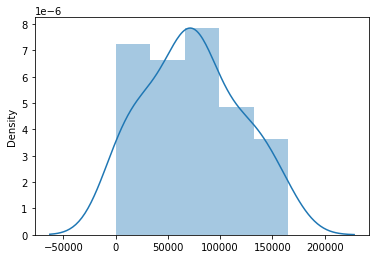

In [65]:
import seaborn as sns
%matplotlib inline

sns.distplot(features[:,3])

In [66]:
features[:,3]

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [67]:
%%time
np.co(features[:,3])

CPU times: user 1.02 ms, sys: 2 µs, total: 1.02 ms
Wall time: 1.07 ms


<timed eval>:1: RuntimeWarning: divide by zero encountered in log


array([12.01581488, 11.99903433, 11.94107473, 11.88015142, 11.86433797,
       11.78962419, 11.81017755, 11.77758041, 11.69975783, 11.72265854,
       11.53187557, 11.51962259, 11.44959954, 11.42946114, 11.69477391,
       11.64853628, 11.26463217, 11.4580168 , 11.42681361, 11.36697094,
       11.24182332, 11.26944489, 11.21174686, 11.12036469, 11.2521321 ,
       11.07697089, 11.22961874, 11.18591473, 11.09819032, 11.09141451,
       11.03480063, 11.02086239, 11.05735888, 10.92402928, 10.74561643,
       10.73670141, 10.26338889, 10.69353342,  9.91490166, 10.55993211,
       10.26654364, 10.23612817, 10.07073481,  9.64896491, 10.00684436,
        6.90798525,  7.18194169,        -inf,  6.29535825,        -inf])

In [68]:
#FeatureScaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

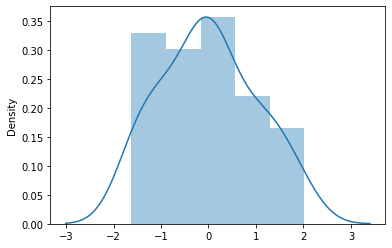

In [69]:
sns.distplot(features[:,3])

In [70]:
features[:,3]

array([ 2.01641149,  1.95586034,  1.75436374,  1.55478369,  1.5049372 ,
        1.27980001,  1.34006641,  1.24505666,  1.03036886,  1.09181921,
        0.62039825,  0.59308542,  0.44325987,  0.4020776 ,  1.01718075,
        0.89791312,  0.0944412 ,  0.46072013,  0.39672494,  0.27944165,
        0.05572609,  0.1027236 ,  0.00600658, -0.13620072,  0.0731146 ,
       -0.19931169,  0.0353702 , -0.03551899, -0.16879272, -0.17860854,
       -0.25807437, -0.27695823, -0.22694868, -0.40112892, -0.60068212,
       -0.60974994, -0.99157015, -0.65253231, -1.17717755, -0.77382036,
       -0.98957702, -1.00853372, -1.10210556, -1.28113364, -1.13430539,
       -1.60035036, -1.59341322, -1.62236202, -1.61043334, -1.62236202])

In [71]:
%%time
np.log(features[:,3])

CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.7 ms


<timed eval>:1: RuntimeWarning: invalid value encountered in log


array([ 0.70131944,  0.67083017,  0.56210625,  0.44133643,  0.40875117,
        0.24670383,  0.29271917,  0.21918104,  0.02991686,  0.0878453 ,
       -0.47739367, -0.52241685, -0.81359906, -0.91111017,  0.01703483,
       -0.10768196, -2.35977791, -0.77496452, -0.92451209, -1.27496178,
       -2.8873069 , -2.2757134 , -5.11490009,         nan, -2.6157272 ,
               nan, -3.34188554,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

In [23]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=1)

In [24]:
# Build Model 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
print("Training Score is : " ,model.score(X_train,y_train))
print("Testing Score is : " ,model.score(X_test,y_test))

Training Score is :  0.942446542689397
Testing Score is :  0.9649618042060469


In [26]:
ohe.categories_

[array(['California', 'Florida', 'New York'], dtype=object)]

In [27]:
ohe.transform(np.array([["California"]]))

array([[1., 0., 0.]])

In [28]:
# Deployment Test
#

rdSpend = float(input("Enter R&D Spend: "))
admSpend = float(input("Enter Administration Spend: "))
markSpend = float(input("Enter Marketing Spend: "))
state = input("Enter State: ")

refState = ['California', 'Florida','New York']

if state in refState:

  stateDummy = ohe.transform(np.array([[state]]))
  

  finalFeatures = np.concatenate((stateDummy, np.array([[rdSpend,admSpend,markSpend]])) , axis=1)

  stdScaleFeatures = sc.transform(finalFeatures)

  profit = model.predict(finalFeatures)[0][0]

  print("Predicted profit is $ {}".format(profit))


else:
  print("Model can't predict profit for the given {} state".format(state))

Enter R&D Spend: 3434434
Enter Administration Spend: 2323323
Enter Marketing Spend: 34343434
Enter State: California
Predicted profit is $ 240470813913.9813


In [14]:
2323# To dump the memory object

import pickle

pickle.dump(model, open('CompanyProfitPredictor.pkl','wb'))
pickle.dump(ohe, open('StateEncoder.enc','wb'))

In [ ]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
# [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,1.3689780e+05, 4.7178410e+05]
#   California      Florida        New York        rdSpend        admSpend     markSpend